<a href="https://colab.research.google.com/github/knotseaborg/Machine-Learning-Projects/blob/master/Image_Segmentation_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://www.learnopencv.com/pytorch-for-beginners-semantic-segmentation-using-torchvision/

Use torchvision to import pretrained models. In this case, I'm using the full Convolution Residual Neural network for Segmentation. It has already been trained and should work well.

In [0]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


2020-02-17 09:14:45 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "bird.png" [1]


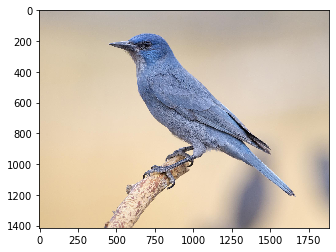

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./bird.png')
plt.imshow(img); plt.show()

Preprocessing steps

1. Resize
2. CenterCrop
3. Convert to tensor
4. Normalize according to imagenet requirements

In [0]:
import torchvision.transforms as T
trf = T.Compose([T.Resize(256), 
                 T.CenterCrop(224),
                 T.ToTensor(),
                 T.Normalize(mean = [0.485, 0.456, 0.406],
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [0]:
out = fcn(inp)['out']
print(out.shape)

torch.Size([1, 21, 224, 224])


In [0]:
torch.argmax(out.squeeze(0), dim=0).detach().cpu().numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Here, 21 classes are present. So, we must flatten the image to obtain classes

In [0]:
import numpy as np
om = torch.argmax(out.squeeze(0), dim=0).detach().cpu().numpy()
print(om.shape)

(224, 224)


In [0]:
print(np.unique(om))

[0 3]


In [0]:
label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
print(label_colors.shape)

(21, 3)


In [0]:
def decode_segmap(image, nc=21):
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)

  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l,0]
    g[idx] = label_colors[l,1]
    b[idx] = label_colors[l,2]

  rgb = np.stack([r,g,b], axis = 2)
  return rgb

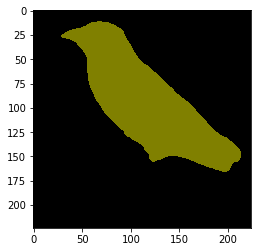

In [0]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

In [0]:
def segment(net, path):
  img = Image.open(path)
  plt.imshow(img);plt.axis('off'); plt.show()
  trf = T.Compose([T.Resize(256), 
                   T.CenterCrop(224),
                   T.ToTensor(),
                   T.Normalize(mean=[0.485, 0.456, 0.406],
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb);plt.axis('off');plt.show()


2020-02-17 10:00:32 URL:https://cdn.vox-cdn.com/thumbor/TYrK48wL66P19kUldZqDzqBXMz8=/0x0:5126x3418/1200x800/filters:focal(2403x533:3223x1353)/cdn.vox-cdn.com/uploads/chorus_image/image/65571167/1142444141.jpg.0.jpg [151835/151835] -> "img.jpg" [1]


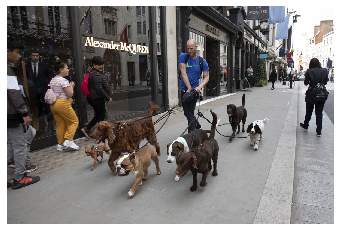

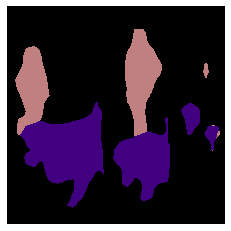

In [0]:
!wget -nv 'https://cdn.vox-cdn.com/thumbor/TYrK48wL66P19kUldZqDzqBXMz8=/0x0:5126x3418/1200x800/filters:focal(2403x533:3223x1353)/cdn.vox-cdn.com/uploads/chorus_image/image/65571167/1142444141.jpg.0.jpg' -O img.jpg
segment(fcn, 'img.jpg')

Using DeepLab

In [0]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
